In [1]:
import pandas as pd
import numpy as np

In [7]:
movies = pd.read_csv('/Users/nandanpatel/Projects/Movie Recomendation System/Colaborative Filtering/dataset/movies.csv')
ratings = pd.read_csv('/Users/nandanpatel/Projects/Movie Recomendation System/Colaborative Filtering/dataset/ratings.csv')

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
final = ratings.pivot(index='movieId', columns='userId', values='rating')
final.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
final.shape

(9724, 610)

In [25]:
final.fillna(0, inplace=True)

In [27]:
final.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
no_user_rated = ratings.groupby('movieId')['rating'].agg('count')

In [41]:
no_movie_rated = ratings.groupby('userId')['rating'].agg('count')

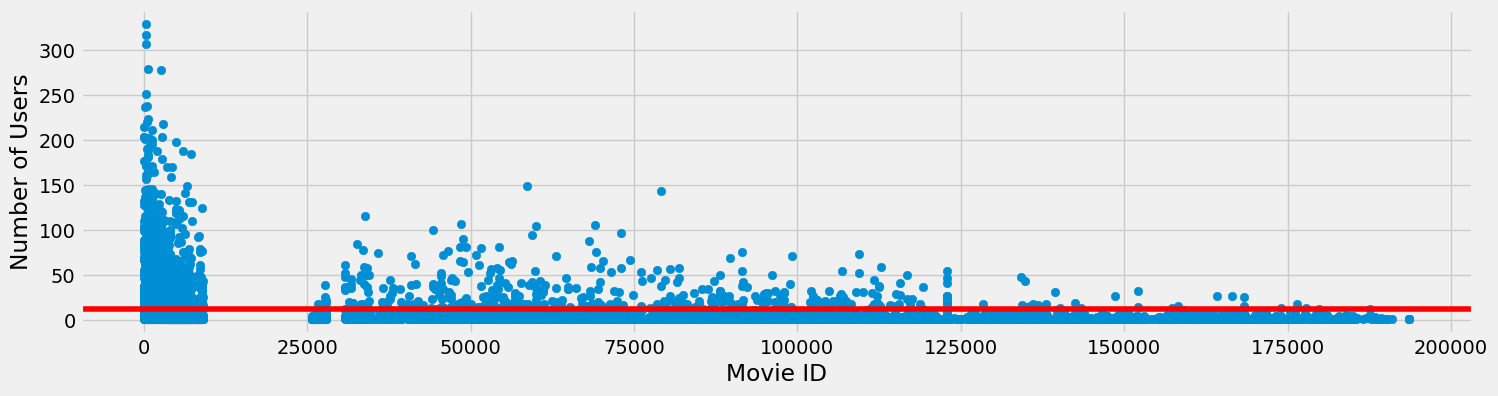

In [57]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, axis = plt.subplots(1, 1, figsize=(16, 4))
plt.scatter(no_user_rated.index, no_user_rated)
plt.axhline(y = 12, color='red')
plt.xlabel('Movie ID')
plt.ylabel('Number of Users')
plt.show()

In [61]:
final = final.loc[no_user_rated[no_user_rated > 12].index, :]

In [63]:
final

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
168252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


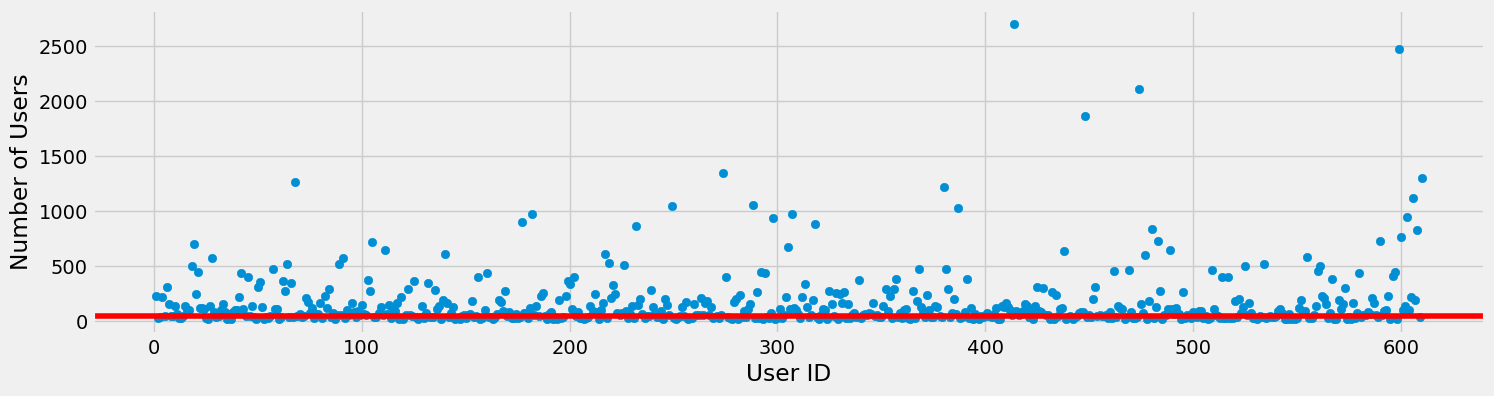

In [65]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, axis = plt.subplots(1, 1, figsize=(16, 4))
plt.scatter(no_movie_rated.index, no_movie_rated)
plt.axhline(y = 50, color='red')
plt.xlabel('User ID')
plt.ylabel('Number of Users')
plt.show()

In [71]:
final = final.loc[ :, no_movie_rated[no_movie_rated > 50].index]

In [73]:
final

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
168252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
from scipy.sparse import csr_matrix

csr_data = csr_matrix(final.values)
final.reset_index(inplace=True)

In [79]:
print(csr_data)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (1847, 31)	3.0
  (1847, 37)	4.0
  (1847, 41)	3.5
  (1847, 83)	3.5
  (1847, 115)	4.5
  (1847, 155)	2.5
  (1847, 156)	4.5
  (1847, 197)	4.5
  (1847, 210)	4.5
  (1847, 236)	4.0
  (1847, 256)	5.0
  (1847, 345)	5.0
  (1847, 357)	2.5
  (1847, 367)	3.5
  (1847, 369)	4.0
  (1848, 55)	2.0
  (1848, 62)	5.0
  (1848, 98)	1.5
  (1848, 127)	5.0
  (1848, 155)	2.0
  (1848, 187)	4.0
  (1848, 205)	4.0
  (1848, 345)	1.5
  (1848, 357)	4.0
  (1848, 369)	4.5


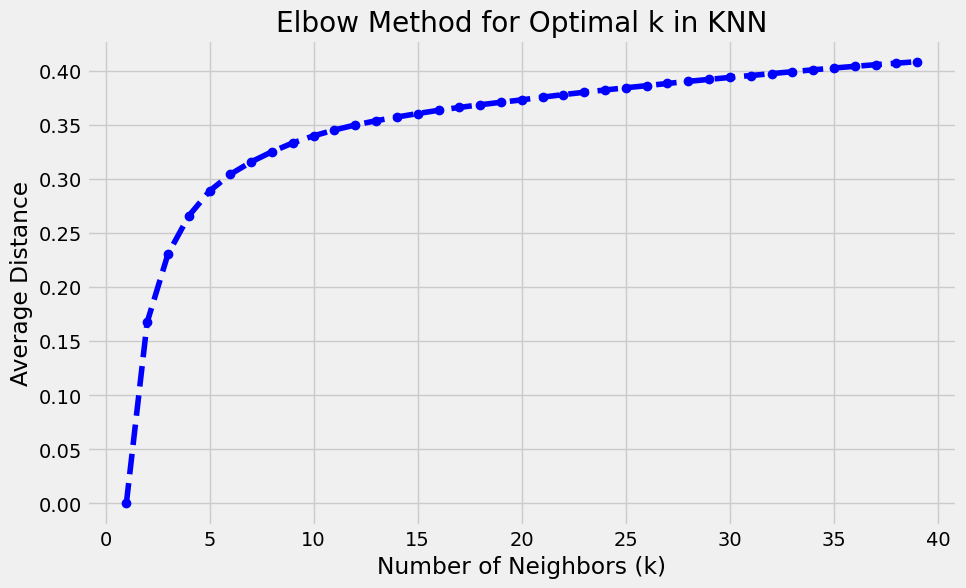

In [159]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

avg_distances = []
neighbors_range = list(range(1, 40))

for k in neighbors_range:
    knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=k, n_jobs=-1)
    knn.fit(csr_data)
    distances, _ = knn.kneighbors(csr_data[0], n_neighbors=k)
    avg_distances.append(np.mean(distances))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(neighbors_range, avg_distances, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method for Optimal k in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Distance')
plt.grid(True)
plt.show()

In [81]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_recommendations_combined(titles, scores):
    df_heat = pd.DataFrame(scores, index=titles, columns=["Cosine Distance"])

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    axes[0].barh(titles[::-1], scores[::-1], color='skyblue')
    axes[0].set_xlabel('Cosine Distance (lower is more similar)')
    axes[0].set_title('Top 10 Recommended Movies')

    sns.heatmap(df_heat, annot=True, cmap='coolwarm', cbar=True,
                linewidths=0.5, linecolor='black', fmt=".4f", ax=axes[1])
    axes[1].set_title("Similarity Heatmap")
    axes[1].set_ylabel("")

    plt.tight_layout()
    plt.show()

def get_recommendation(movie_name):
    movie_list = movies[movies['title'].str.contains(movie_name, case=False, na=False)]
    
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = final[final['movieId'] == movie_idx].index[0]
        
        distance, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=10+1)
        
        rec_movies = sorted(
            list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())),
            key=lambda x: x[1]
        )[1:]

        recommended = []
        similarity_scores = []

        for val in rec_movies:
            movie_id = final.loc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_id].index
            recommended.append({'Title': movies.iloc[idx]['title'].values[0]})
            similarity_scores.append(val[1])
        
        df = pd.DataFrame(recommended)
        df.index = np.arange(1, len(df)+1)

        print("\n Recommended Movies:\n")
        print(df)

        titles = [item['Title'] for item in recommended]

        plot_recommendations_combined(titles, similarity_scores)

    else:
        print("Movie not found...")



 Recommended Movies:

                                                Title
1   Star Wars: Episode V - The Empire Strikes Back...
2   Star Wars: Episode VI - Return of the Jedi (1983)
3   Raiders of the Lost Ark (Indiana Jones and the...
4                                  Matrix, The (1999)
5           Indiana Jones and the Last Crusade (1989)
6                           Back to the Future (1985)
7    Star Wars: Episode I - The Phantom Menace (1999)
8                              Terminator, The (1984)
9                          Saving Private Ryan (1998)
10                  Terminator 2: Judgment Day (1991)


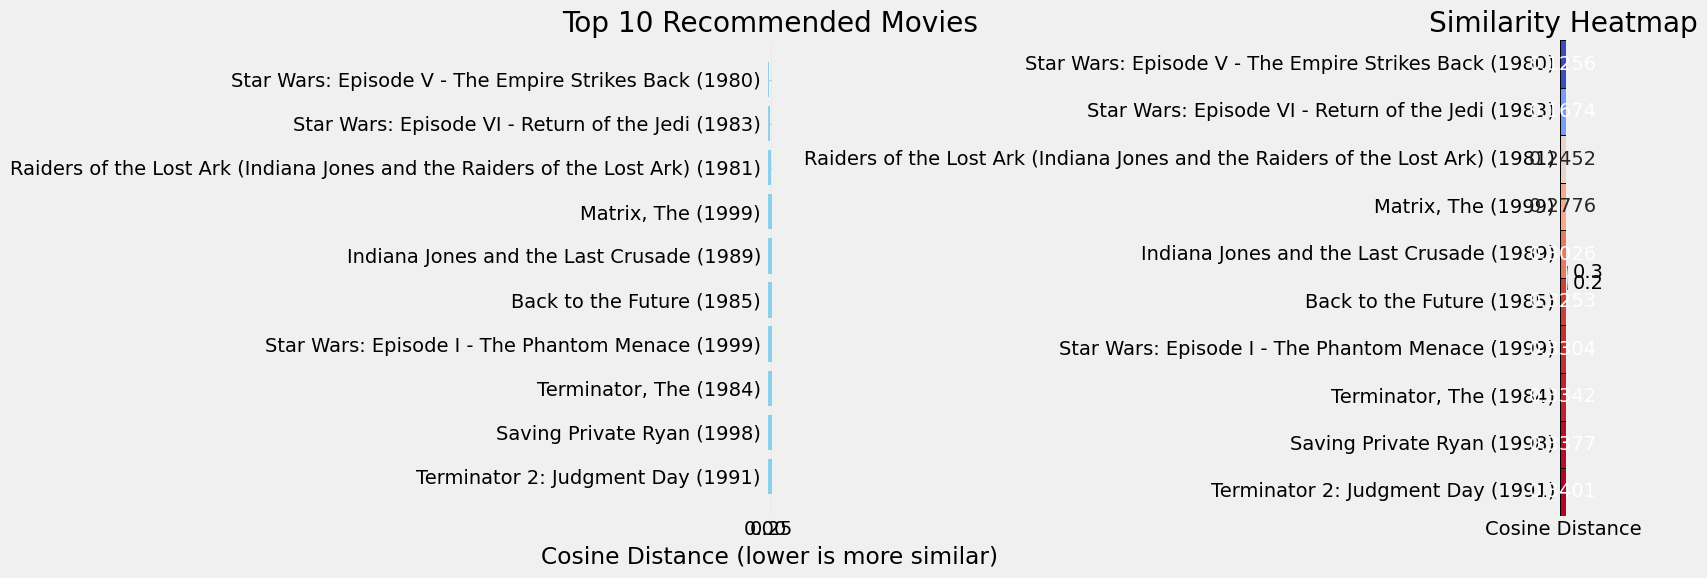

In [209]:
get_recommendation('Star Wars')

In [153]:
import pickle

# Save the KNN model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

# Save the sparse matrix (csr_data)
with open('csr_data.pkl', 'wb') as f:
    pickle.dump(csr_data, f)

# Save the movies DataFrame
with open('movies.pkl', 'wb') as f:
    pickle.dump(movies, f)

# Save the final DataFrame
with open('final.pkl', 'wb') as f:
    pickle.dump(final, f)


In [155]:
with open('csr_data.pkl', 'wb') as f:
    pickle.dump(csr_data, f)